Import necessary libraries for data handling and visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import all necessary libraries for training

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Load the CSV file and name the first two columns as 'label' and 'message'

Display the first 5 rows

In [4]:
df = pd.read_csv('../data/spam.csv', encoding='latin1', names=["label", "message"], header=None)
df.head()

label message
v1   v2                                                 NaN   NaN     NaN
ham  Go until jurong point, crazy.. Available only i... NaN   NaN     NaN
     Ok lar... Joking wif u oni...                      NaN   NaN     NaN
spam Free entry in 2 a wkly comp to win FA Cup final... NaN   NaN     NaN
ham  U dun say so early hor... U c already then say...  NaN   NaN     NaN

Drop rows where 'message' is NaN (missing) to ensure only valid messages are used

In [7]:
df = df.dropna(subset=['message'])

In [8]:
df

label  \
ham \Wen u miss someone                                 the person is definitely special for u..... Bu...                          why to miss them   
    Edison has rightly said, \A fool can ask more q... GN                                                                                        GE   
    I just lov this line: \Hurt me with the truth       I don't mind                                       i wil tolerat.bcs ur my someone..... But   
    \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEA...  HAD A COOL NYTHO                                                             TX 4 FONIN HON   
    When I was born, GOD said, \Oh No! Another IDIO...  GOD said                                                   \"OH No! COMPETITION\". Who knew   
    Edison has rightly said, \A fool can ask more q... GN                                                                                        GE   

                                                                                                                                                     message  
ham \Wen u miss someone                                 the person is definitely special for u..... Bu...                      just Keep-in-touch\" gdeve.."  
    Edison has rightly said, \A fool can ask more q... GN                                                                                            GNT:-)"  
    I just lov this line: \Hurt me with the truth       I don't mind                                        Never comfort me with a lie\" gud ni8 and swe...  
    \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEA...  HAD A COOL NYTHO                                                 CALL 2MWEN IM BK FRMCLOUD 9! J X\""  
    When I was born, GOD said, \Oh No! Another IDIO...  GOD said                                             one day these two will become FREINDS FOREVER!"  
    Edison has rightly said, \A fool can ask more q... GN                                                                                            GNT:-)"

Keep only the first two columns (label and message), discard the rest

In [10]:
df = pd.read_csv('../data/spam.csv', encoding='latin1', header=None)
df = df.iloc[:, :2]  # Only keep first two columns
df.columns = ['label', 'message']


Retain only rows where label is either 'ham' or 'spam' (ignore malformed entries)

In [11]:
df = df[df['label'].isin(['ham', 'spam'])].copy()

Remove rows where message is just whitespace

In [12]:
df.dropna(subset=['message'], inplace=True)
df = df[df['message'].str.strip().astype(bool)]

Split dataset into training and test sets (80% train, 20% test)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       964
        spam       1.00      0.81      0.90       151

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



Save trained model and vectorizer as pickle files

In [24]:
import joblib
joblib.dump(model, '../outputs/spam_model.pkl')

['../outputs/spam_model.pkl']

In [25]:
joblib.dump(vectorizer, '../outputs/vectorizer.pkl')

['../outputs/vectorizer.pkl']

Compute confusion matrix from predictions

Display and save the confusion matrix image

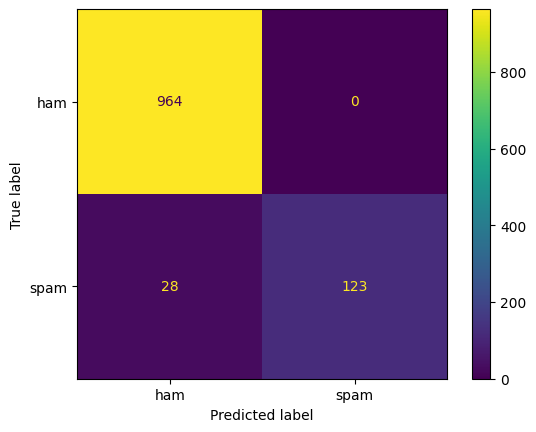

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.savefig('../outputs/confusion_matrix.png')